In [ ]:
# Import Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Import Sampling Related Packages
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load the Dataset (only train have target, so train should be split into new train and test)
train_df = pd.read_csv('./data/1_clean_train.csv')
# extract X and y
X = train_df.drop('credit_score', axis=1)
y = train_df['credit_score']
train_df.head()

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
0,0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,...,0,0,0,0,0,0,0,1,0,0
1,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,4.0,...,0,0,0,0,0,0,0,1,0,0
2,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,...,0,0,0,0,0,0,0,1,0,0
3,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,...,0,0,0,0,0,0,0,1,0,0
4,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Split the Data before Sampling, since we want to keep the test set as it is
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Save the test set - Combined X_test and y_test
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv('./data/2_new_train.csv', index=False)
test = pd.concat([X_test, y_test], axis=1)
test.to_csv('./data/2_new_test.csv', index=False)

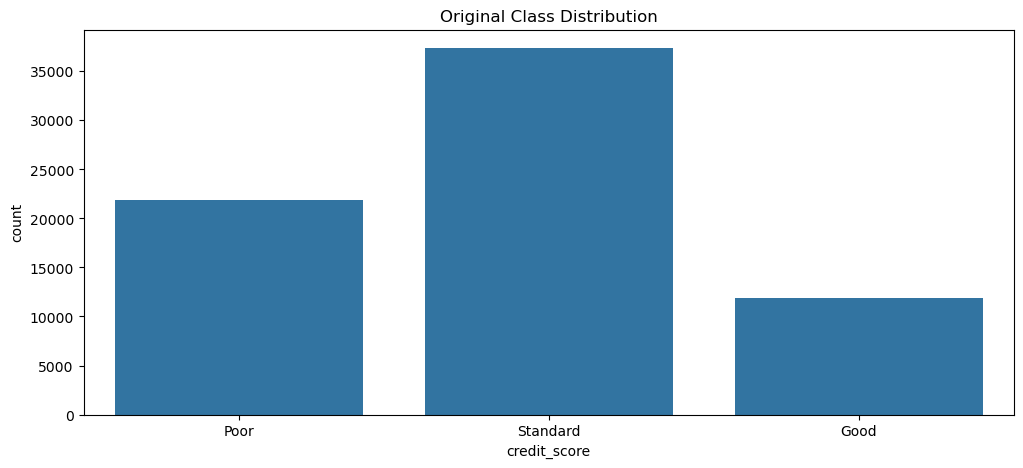

In [4]:
train_df = pd.read_csv('./data/2_new_train.csv')
X = train_df.drop('credit_score', axis=1)
y = train_df['credit_score']

# Check the class distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='credit_score', data=train_df)
plt.xticks(ticks=[0,1,2], labels=['Poor', 'Standard', 'Good'])
plt.title('Original Class Distribution')
# plt.savefig('./image/original_class_distribution.png')
# plt.close()
plt.show()

Random Oversampling

In [5]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
pd.Series(y_ros).value_counts()

# To CSV - Combine X and y
ros_df = pd.concat([X_ros, y_ros], axis=1)
ros_df.to_csv('./data/2_new_train_ros.csv', index=False)

SMOTE Balancing

In [6]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
pd.Series(y_smote).value_counts()

# To CSV - Combine X and y
smote_df = pd.concat([X_smote, y_smote], axis=1)
smote_df.to_csv('./data/2_new_train_smote.csv', index=False)

Visualisation

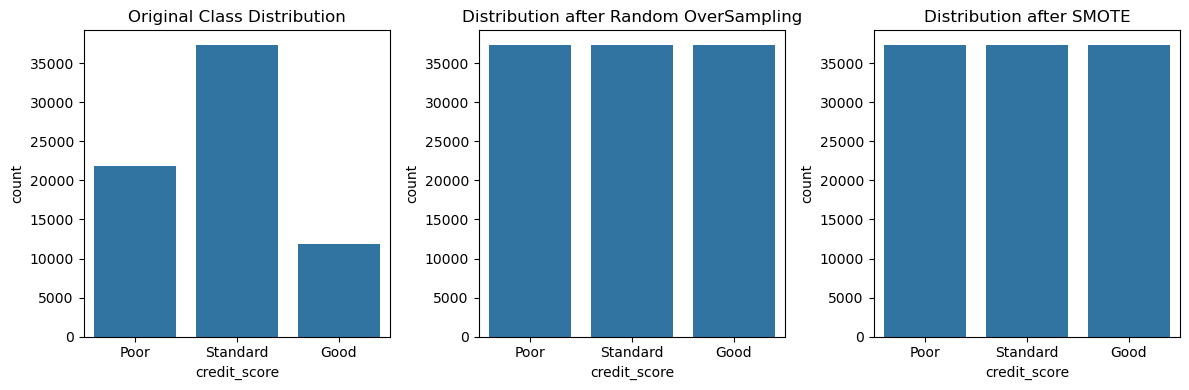

In [7]:
plt.figure(figsize=(12, 4))
# Before OverSampling
plt.subplot(1, 3, 1)
sns.countplot(x='credit_score', data=train_df)
plt.xticks(ticks=[0,1,2], labels=['Poor', 'Standard', 'Good'])
plt.title('Original Class Distribution')

# After Random OverSampling
plt.subplot(1, 3, 2)
sns.countplot(x=y_ros)
plt.xticks(ticks=[0,1,2], labels=['Poor', 'Standard', 'Good'])
plt.title('Distribution after Random OverSampling')

# After SMOTE
plt.subplot(1, 3, 3)
sns.countplot(x=y_smote)
plt.xticks(ticks=[0,1,2], labels=['Poor', 'Standard', 'Good'])
plt.title('Distribution after SMOTE')

# Show the plot
plt.tight_layout()
plt.show()
# plt.savefig('./image/class_distribution_comparison.png')
# plt.close()